In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfnp=pd.read_csv("final_np.csv")
dfnp.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199997,20000001.0,8.310655,0.0,2.538302,2.1002670447851663,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
1,0,199997,20000001.0,16.950289,0.0,1.254897,1.6609617588915819,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
2,0,199997,20000001.0,21.906004,0.0,0.892685,1.4829045355582708,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
3,0,199997,20000001.0,28.154620,0.0,0.545787,1.2588634898032260,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
4,0,199997,20000001.0,30.795764,0.0,0.428029,1.1609898887115120,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0


In [3]:
dflp=pd.read_csv("final_lp.csv")
dflp.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199996,20000001.0,0.062619,0.153949,5.181499,2.6373876497588316,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
1,0,199996,20000001.0,9.264290,0.000000,2.365437,2.0515107355230997,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
2,0,199996,20000001.0,24.468780,0.000000,0.705802,1.3713699190506510,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
3,0,199996,20000001.0,35.051390,0.000000,0.352469,1.0883202577546427,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
4,0,199996,20000001.0,38.588809,0.000000,0.189694,0.88532563779649975,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0


In [4]:
dfhp=pd.read_csv("final_hp.csv")
dfhp.head()

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199997,20000001.0,0.062708,0.252346,5.155461,2.6159348107956948,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
1,0,199997,20000001.0,16.796458,0.000000,1.415680,1.7288645633986648,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
2,0,199997,20000001.0,20.815876,0.000000,0.995041,1.5374846471938246,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
3,0,199997,20000001.0,25.397079,0.000000,0.603044,1.3013791181400221,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
4,0,199997,20000001.0,28.715771,0.000000,0.409572,1.1440280457618968,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0


In [5]:
badnp=dfnp.ident[np.isnan((dfnp['rplanet(i)/radtie']).astype(float))]
badlp=dflp.ident[np.isnan((dflp['rplanet(i)/radtie']).astype(float))]
badhp=dfhp.ident[np.isnan((dfhp['rplanet(i)/radtie']).astype(float))]

In [6]:
print(badnp.shape,badlp.shape,badhp.shape)

(12,) (20,) (16,)


In [7]:
inp=np.unique(dfnp.ident)
ilp=np.unique(dflp.ident)
ihp=np.unique(dfhp.ident)
print(len(inp),len(ilp),len(ihp))

1692 2946 2949


In [8]:
inpn=inp[~np.in1d(inp,badnp)]
ilpn=ilp[~np.in1d(ilp,badlp)]
ihpn=ihp[~np.in1d(ihp,badhp)]
print(len(inpn),len(ilpn),len(ihpn))

1680 2926 2933


In [9]:
inp1=inpn[np.in1d(inpn,ilpn)]
inp2=inp1[np.in1d(inp1,ihpn)]
print(len(inp2))

1652


In [10]:
fnp=np.in1d(dfnp.ident,inp2)

In [11]:
flp=np.in1d(dflp.ident,inp2)

In [12]:
fhp=np.in1d(dfhp.ident,inp2)

In [13]:
dfn=dfnp[fnp]
dfn.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199997,20000001.0,8.310655,0.0,2.538302,2.1002670447851663,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
1,0,199997,20000001.0,16.950289,0.0,1.254897,1.6609617588915819,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
2,0,199997,20000001.0,21.906004,0.0,0.892685,1.4829045355582708,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
3,0,199997,20000001.0,28.154620,0.0,0.545787,1.2588634898032260,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0
4,0,199997,20000001.0,30.795764,0.0,0.428029,1.1609898887115120,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.0,1.0,0.1,0.07707,9268935.0


In [14]:
dfl=dflp[flp]
dfl.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199996,20000001.0,0.062619,0.153949,5.181499,2.6373876497588316,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
1,0,199996,20000001.0,9.264290,0.000000,2.365437,2.0515107355230997,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
2,0,199996,20000001.0,24.468780,0.000000,0.705802,1.3713699190506510,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
3,0,199996,20000001.0,35.051390,0.000000,0.352469,1.0883202577546427,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0
4,0,199996,20000001.0,38.588809,0.000000,0.189694,0.88532563779649975,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.1,1.0,0.1,0.07707,9268935.0


In [15]:
dfh=dfhp[fhp]
dfh.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199997,20000001.0,0.062708,0.252346,5.155461,2.6159348107956948,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
1,0,199997,20000001.0,16.796458,0.000000,1.415680,1.7288645633986648,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
2,0,199997,20000001.0,20.815876,0.000000,0.995041,1.5374846471938246,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
3,0,199997,20000001.0,25.397079,0.000000,0.603044,1.3013791181400221,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0
4,0,199997,20000001.0,28.715771,0.000000,0.409572,1.1440280457618968,1.893981e+33,59.88237,1.051847,228.821929,0.58,1.0,0.3,1.0,0.1,0.07707,9268935.0


In [16]:
dh=dfh[dfh.emed<0.2]
dl=dfl[dfl.emed<0.2]
dn=dfn[dfn.emed<0.2]

In [17]:
len(np.unique(dh.ident))

1235

In [18]:
dn.to_csv('no_pert.csv')
dh.to_csv('hi_pert.csv')
dl.to_csv('lo_pert.csv')

In [19]:
# new version of reduce.py
import pandas as pd
import numpy as np
import sys
resf=['no_pert.csv','lo_pert.csv','hi_pert.csv']
for resfile in resf:
    dff=pd.read_csv(resfile)
    names="ident, com, nplanets, massbudget, massefficiency, sigmag0, md, rc, ms, metal, taugas"
    nlist=names.replace(',','').split()
    mass=dff['emepla(i)/emet']+dff['emegas(i)']
    dfter=dff[mass<10.]
    rdata=np.zeros((len(np.unique(dfter.ident)),11))
    kk=0
    for i in np.unique(dfter.ident):    
        filter=dfter.ident==i
        dummy=dfter[filter]
        pmass=dummy['emepla(i)/emet']+dummy['emegas(i)']
        com=((pmass*dummy['a(i)']).sum())/pmass.sum()
        npl=len(dummy)
        mbud=pmass.sum()
        effm=mbud*3e-6/(dummy.emed.iloc[0])
        sigmag0=dummy.sigmag_0.iloc[0]
        md=dummy.emed.iloc[0]
        rc=dummy.rc.iloc[0]
        ms=dummy.emestar.iloc[0]
        metal=dummy.emetal.iloc[0]
        taugas=dummy.taugas.iloc[0]
        rdata[kk,:]=i,com,npl,mbud,effm,sigmag0,md,rc,ms,metal,taugas  
        kk=kk+1
    pd.DataFrame(rdata,columns=nlist).to_csv('tr_%s.csv'%resfile[:-4])
    dfgia=dff[mass>=10.]
    rdatag=np.zeros((len(np.unique(dfgia.ident)),11))
    kk=0
    for i in np.unique(dfgia.ident):    
        filter=dfgia.ident==i
        dummy=dfgia[filter]
        pmass=dummy['emepla(i)/emet']+dummy['emegas(i)']
        com=((pmass*dummy['a(i)']).sum())/pmass.sum()
        npl=len(dummy)
        mbud=pmass.sum()
        effm=mbud*3e-6/(dummy.emed.iloc[0])
        sigmag0=dummy.sigmag_0.iloc[0]
        md=dummy.emed.iloc[0]
        rc=dummy.rc.iloc[0]
        ms=dummy.emestar.iloc[0]
        metal=dummy.emetal.iloc[0]
        taugas=dummy.taugas.iloc[0]
        rdatag[kk,:]=i,com,npl,mbud,effm,sigmag0,md,rc,ms,metal,taugas      
        kk=kk+1
    pd.DataFrame(rdatag,columns=nlist).to_csv('gt_%s.csv'%resfile[:-4])
    print("Total systems: "+str(len(np.unique(dff.ident))))
    print("Systems with giant planets: "+str(kk-1))
    print("%.1f percent of all planets are below 10 earth masses" %(100.*len(dfter)/len(dff)))

Total systems: 1235
Systems with giant planets: 377
96.8 percent of all planets are below 10 earth masses
Total systems: 1235
Systems with giant planets: 434
96.3 percent of all planets are below 10 earth masses
Total systems: 1235
Systems with giant planets: 442
96.2 percent of all planets are below 10 earth masses


In [20]:
dnpg=pd.read_csv('gt_no_pert.csv')
dlpg=pd.read_csv('gt_lo_pert.csv')
dhpg=pd.read_csv('gt_hi_pert.csv')


In [21]:
dnpt=pd.read_csv('tr_no_pert.csv')
dlpt=pd.read_csv('tr_lo_pert.csv')
dhpt=pd.read_csv('tr_hi_pert.csv')

In [22]:
filtern=dnpg.nplanets==1
filterl=dlpg.nplanets==1
filterh=dhpg.nplanets==1

(array([ 145.,   41.,   33.,   30.,   25.,   10.,    7.,   10.,    3.,    1.]),
 array([  2.80487363e-04,   9.91217682e-02,   1.97963049e-01,
          2.96804330e-01,   3.95645611e-01,   4.94486892e-01,
          5.93328172e-01,   6.92169453e-01,   7.91010734e-01,
          8.89852015e-01,   9.88693296e-01]),
 <a list of 10 Patch objects>)

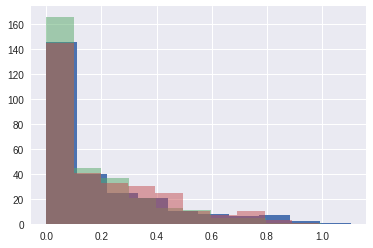

In [25]:
plt.hist(dnpg.massefficiency[filtern])
plt.hist(dlpg.massefficiency[filterl],alpha=0.5)
plt.hist(dhpg.massefficiency[filterh],alpha=0.5)




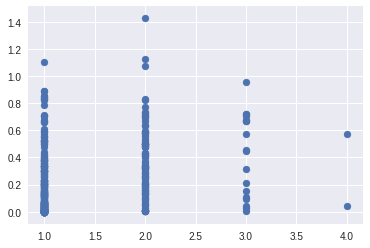

In [26]:
plt.scatter(dnpg.nplanets,dnpg.massefficiency)

In [27]:
dnpg['logeff']=np.log10(dnpg.massefficiency)
dlpg['logeff']=np.log10(dlpg.massefficiency)
dhpg['logeff']=np.log10(dhpg.massefficiency)

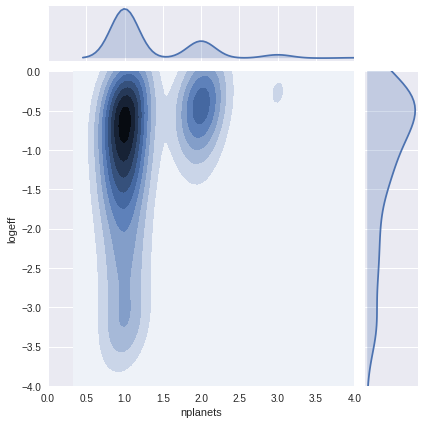

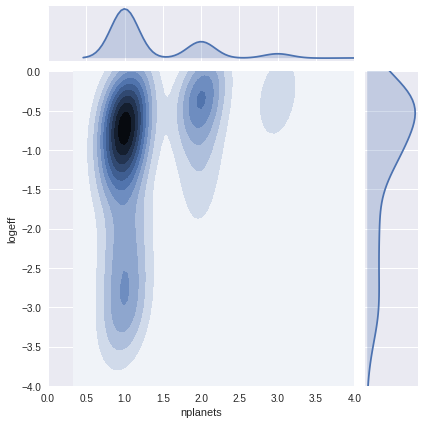

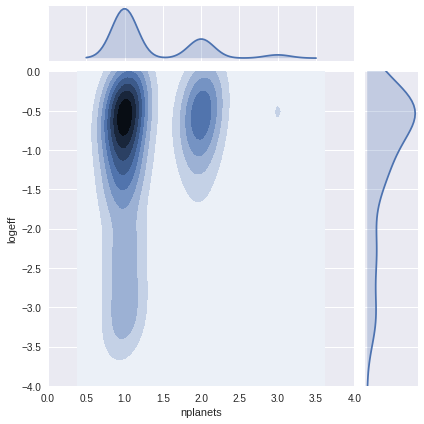

In [28]:
ax=sns.jointplot(x="nplanets", y="logeff", data=dnpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))
ax=sns.jointplot(x="nplanets", y="logeff", data=dlpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))
ax=sns.jointplot(x="nplanets", y="logeff", data=dhpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))

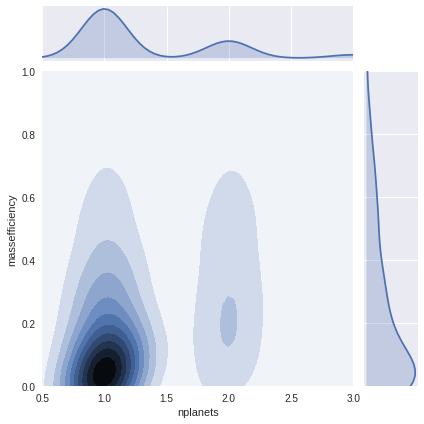

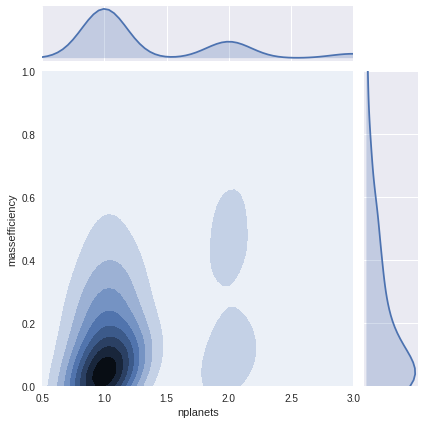

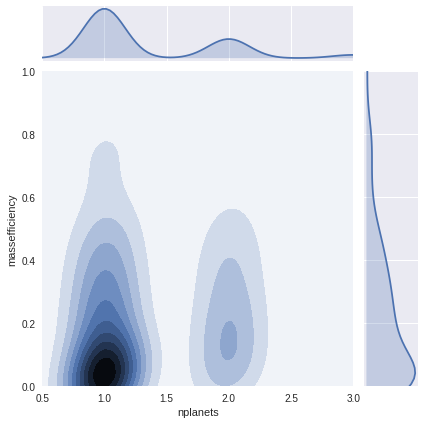

In [29]:
ax=sns.jointplot(x="nplanets", y="massefficiency", data=dnpg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(0,1))
ax=sns.jointplot(x="nplanets", y="massefficiency", data=dlpg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(0,1))
ax=sns.jointplot(x="nplanets", y="massefficiency", data=dhpg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(0,1))

In [30]:
dnpt['logeff']=np.log10(dnpt.massefficiency)
dlpt['logeff']=np.log10(dlpt.massefficiency)
dhpt['logeff']=np.log10(dhpt.massefficiency)

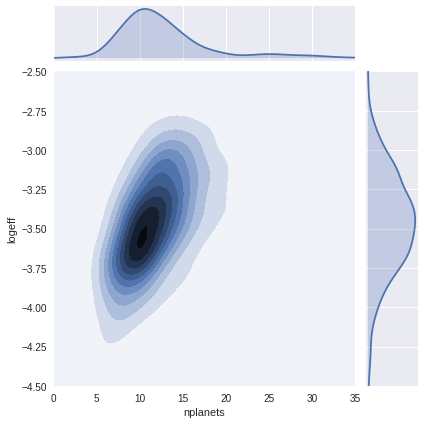

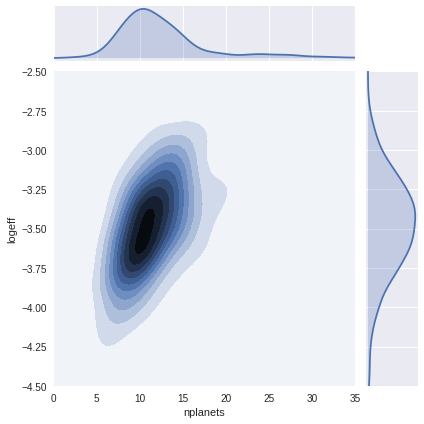

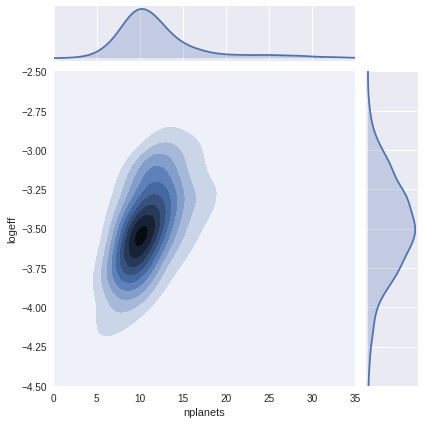

In [31]:
ax=sns.jointplot(x="nplanets", y="logeff", data=dnpt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))
ax=sns.jointplot(x="nplanets", y="logeff", data=dlpt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))
ax=sns.jointplot(x="nplanets", y="logeff", data=dhpt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))

In [32]:
x=dnpt.nplanets
y=dnpt.logeff

In [33]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

def uni_kde(x,y,tickno=5,nlev=30):
    x_grid=np.around(np.arange(x.min(),x.max(),0.1),2)
    y_grid=np.linspace(y.min(),y.max(),len(x_grid))
    conv=(x.max()-x.min())/(y.max()-y.min())
    yori=y
    y=y*conv
    y_grid=y_grid*conv
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(x.min(),x.max()/10,30)},
                    cv=20) # 20-fold cross-validation
    grid.fit(np.vstack([x,y]).T)
    print(grid.best_params_)
    X, Y = np.meshgrid(x_grid, y_grid)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    kde2d = grid.best_estimator_
    pdf2d = np.exp(kde2d.score_samples(xy)).reshape(X.shape)
    plt.figure(figsize=(5,5))
    levels = np.linspace(0, pdf2d.max(), nlev)
    plt.contourf(X, Y, pdf2d, levels=levels, cmap=plt.cm.Reds)
    tickno=5
    old_ticks=np.linspace(y.max(), y.min(), tickno)
    major_ticks = 10**np.linspace(yori.max(), yori.min(), tickno)
    myticks=[]
    for i in major_ticks:
        myticks+=["%.e"%i]
    e=plt.yticks(old_ticks,myticks) 

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'bandwidth': 1.0862068965517242}


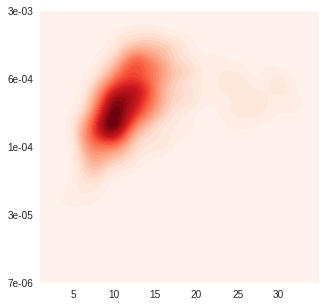

In [34]:
uni_kde(dnpt.nplanets,dnpt.logeff)

{'bandwidth': 1.1793103448275861}


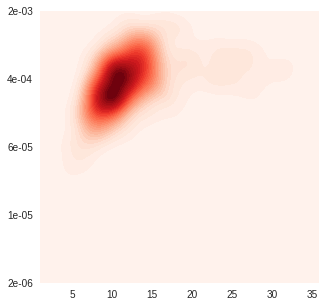

In [35]:
uni_kde(dlpt.nplanets,dlpt.logeff)

{'bandwidth': 2.0}


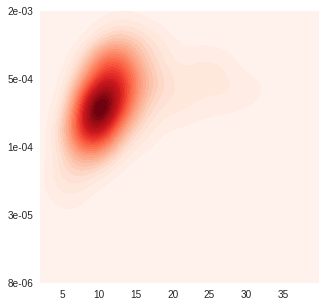

In [36]:
uni_kde(dhpt.nplanets,dhpt.logeff)

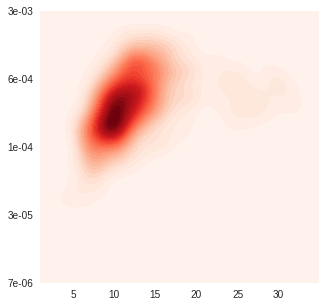

In [136]:
plt.figure(figsize=(5,5))
levels = np.linspace(0, pdf2d.max(), 30)
plt.contourf(X, Y, pdf2d, levels=levels, cmap=plt.cm.Reds)
tickno=5
old_ticks=np.linspace(y.max(), y.min(), tickno)
major_ticks = 10**np.linspace(yori.max(), yori.min(), tickno)
myticks=[]
for i in major_ticks:
    myticks+=["%.e"%i]
e=plt.yticks(old_ticks,myticks) 

In [37]:
dnpg.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,logeff
0,0,1.0,0.035424,1.0,79.227440,0.001320,158.835559,0.180,40.040195,1.425386e+33,-0.092791,3525593.500,-2.879276
1,1,3.0,1.074297,4.0,10758.305004,0.576338,90.793337,0.056,29.539343,1.760227e+33,0.328146,1644710.625,-0.239323
2,2,6.0,0.061043,1.0,2392.571270,0.059814,75.740878,0.120,47.343380,1.723190e+33,0.021273,1790533.125,-1.223195
3,3,7.0,1.324572,1.0,3988.447183,0.066474,139.408777,0.180,42.739063,1.684423e+33,-0.092571,2721394.750,-1.177347
4,4,13.0,0.123937,1.0,2891.237088,0.051022,178.830700,0.170,36.672222,2.412890e+33,-0.174039,3956707.500,-1.292244


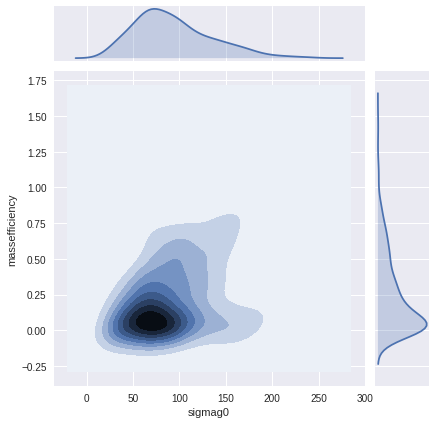

In [38]:
ax=sns.jointplot(x="sigmag0", y="massefficiency", data=dnpg,kind="kde",stat_func=None)

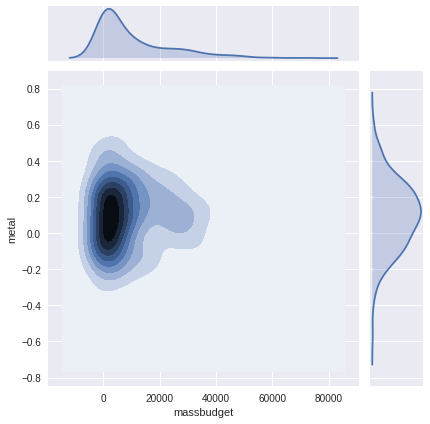

In [39]:
ax=sns.jointplot(x="massbudget", y="metal", data=dnpg,kind="kde",stat_func=None)

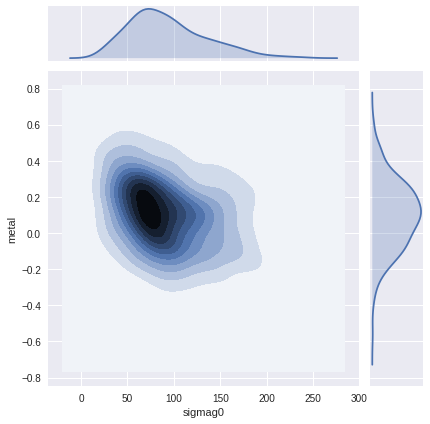

In [40]:
ax=sns.jointplot(x="sigmag0", y="metal", data=dnpg,kind="kde",stat_func=None)

In [41]:
common=dnpt.ident[np.in1d(dnpt.ident,dnpg.ident)]

In [42]:
te=dnpt[np.in1d(dnpt.ident,common)]
gi=dnpg[np.in1d(dnpg.ident,common)]

In [43]:
gi.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,logeff
0,0,1.0,0.035424,1.0,79.227440,0.001320,158.835559,0.180,40.040195,1.425386e+33,-0.092791,3525593.500,-2.879276
1,1,3.0,1.074297,4.0,10758.305004,0.576338,90.793337,0.056,29.539343,1.760227e+33,0.328146,1644710.625,-0.239323
2,2,6.0,0.061043,1.0,2392.571270,0.059814,75.740878,0.120,47.343380,1.723190e+33,0.021273,1790533.125,-1.223195
3,3,7.0,1.324572,1.0,3988.447183,0.066474,139.408777,0.180,42.739063,1.684423e+33,-0.092571,2721394.750,-1.177347
4,4,13.0,0.123937,1.0,2891.237088,0.051022,178.830700,0.170,36.672222,2.412890e+33,-0.174039,3956707.500,-1.292244


In [44]:
tmb=[]
tnp=[]
for i,j,k,l in zip(gi.massbudget,te.massbudget,gi.nplanets,te.nplanets):
    tmb+=[i+j]
    tnp+=[k+l]
tmb=np.array(tmb)
tnp=np.array(tnp)

In [45]:
dfer=pd.DataFrame({'x' : tnp, 'y': np.log10(tmb)})

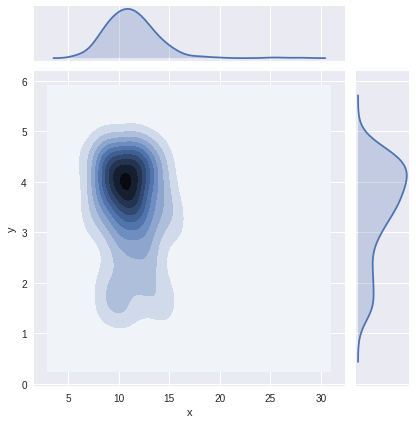

In [46]:
ax=sns.jointplot(x="x", y="y", data=dfer,kind="kde",stat_func=None)